## Mahdi Anvari 610700002 Homework 2 of Machine Learning Question 2

In [23]:
# importing libraries
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Dataset: 
• Load MNIST dataset (could be accessed using from keras.datasets in python)
• Separate them by label into 10 smaller sets

In [9]:
mnist_path = 'c:/Users/M/Downloads/mnist.npz'
with np.load(mnist_path, allow_pickle=True) as f:
    X_train, Y_train = f['x_train'], f['y_train']
    X_test, Y_test = f['x_test'], f['y_test']

X_all = np.concatenate((X_train, X_test), axis=0)
Y_all = np.concatenate((Y_train, Y_test), axis=0)
print((X_all.shape))
print((Y_all.shape))

Sets = [[] for _ in range(10)]
for i in range(len(X_all)):
    label = Y_all[i]
    Sets[label].append(X_all[i])

for i in range(10):
    print(f"Length of label {i} is: ",len(Sets[i]))

(70000, 28, 28)
(70000,)
Length of label 0 is:  6903
Length of label 1 is:  7877
Length of label 2 is:  6990
Length of label 3 is:  7141
Length of label 4 is:  6824
Length of label 5 is:  6313
Length of label 6 is:  6876
Length of label 7 is:  7293
Length of label 8 is:  6825
Length of label 9 is:  6958


a. Flatten the pictures and apply PCA

In [14]:
for i in range(10):
    Sets[i] = np.array(Sets[i])
print(Sets[0].shape)
for i in range(10):
    Sets[i] = (Sets[i]).reshape(Sets[i].shape[0],-1)
print(Sets[0].shape)

(6903, 28, 28)
(6903, 784)


In [20]:
NormalizedSets = [[] for _ in range(10)]
for i in range(10):
    scaler = StandardScaler()
    NormalizedSets[i] = scaler.fit_transform(Sets[i])
print(NormalizedSets[0].shape)

(6903, 784)


In [22]:
PCASets = [[] for _ in range(10)]
for i in range(10):
    NormalizedSets[i] = scaler.fit_transform(Sets[i])
    pca = PCA(n_components=50)
    pca.fit(NormalizedSets[i])
    PCASets[i] = pca.transform(NormalizedSets[i])
print(PCASets[0].shape)

(6903, 50)


b. Plot first PC vs. Second PC

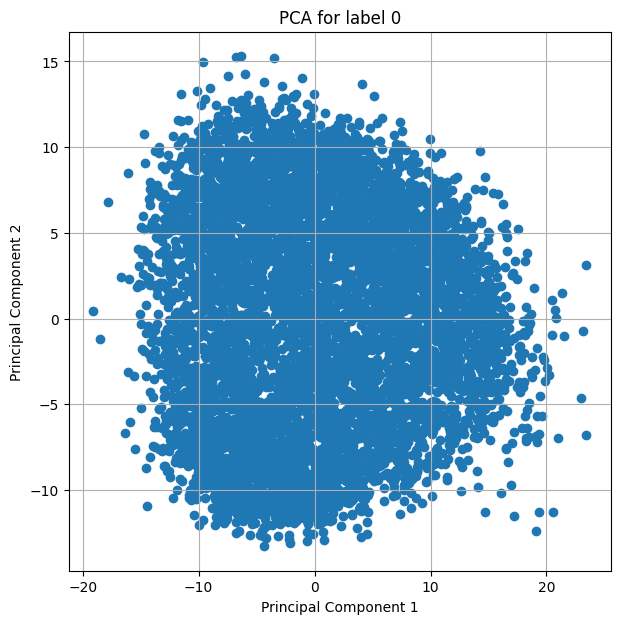

In [47]:
plt.figure(figsize=(7, 7))
plt.scatter(PCASets[0][:, 0], PCASets[0][:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for label 0')
plt.grid(True)
plt.show()

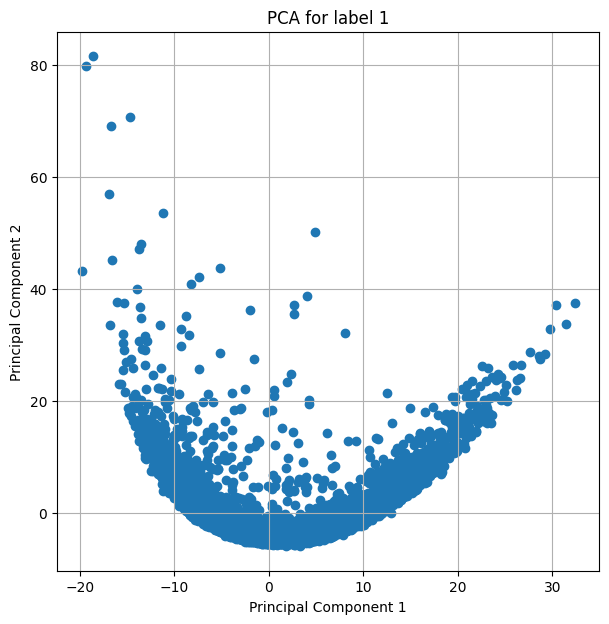

In [48]:
plt.figure(figsize=(7, 7))
plt.scatter(PCASets[1][:, 0], PCASets[1][:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for label 1')
plt.grid(True)
plt.show()

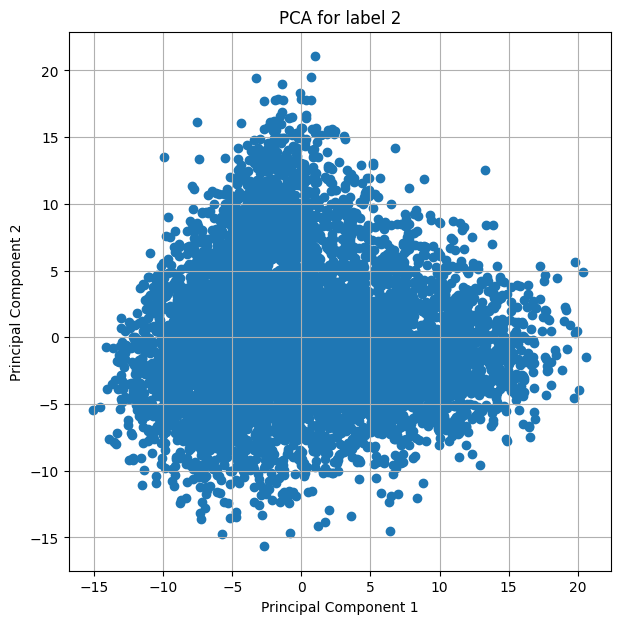

In [49]:
plt.figure(figsize=(7, 7))
plt.scatter(PCASets[2][:, 0], PCASets[2][:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for label 2')
plt.grid(True)
plt.show()

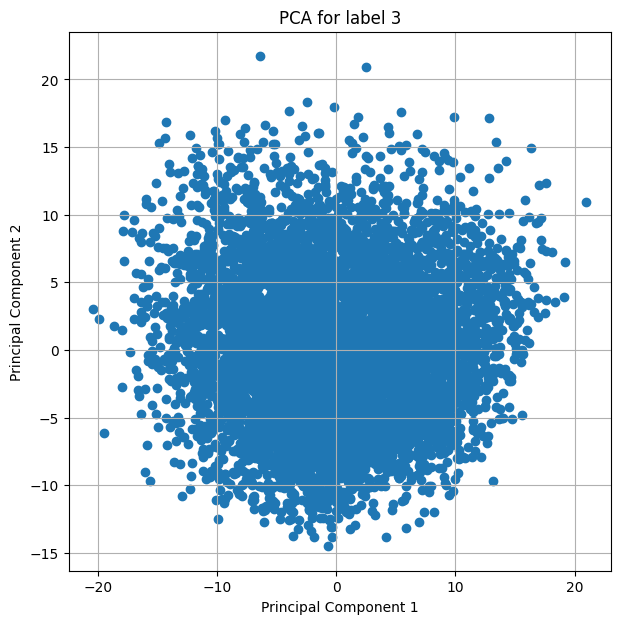

In [50]:
plt.figure(figsize=(7, 7))
plt.scatter(PCASets[3][:, 0], PCASets[3][:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for label 3')
plt.grid(True)
plt.show()

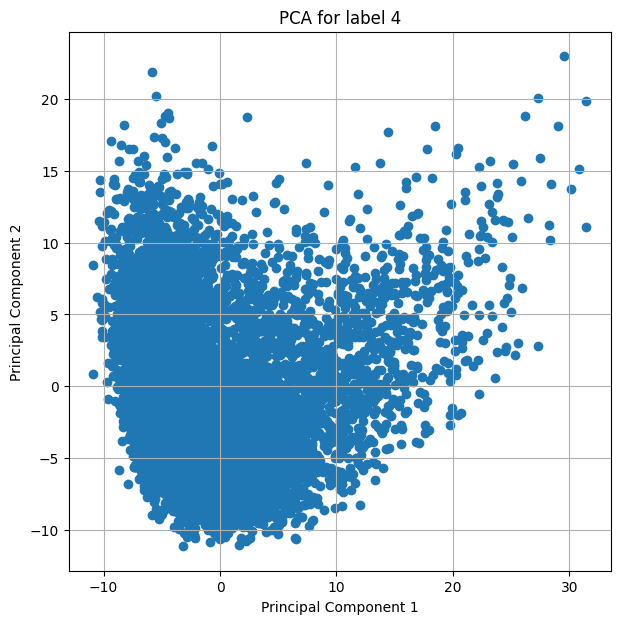

In [51]:
plt.figure(figsize=(7, 7))
plt.scatter(PCASets[4][:, 0], PCASets[4][:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for label 4')
plt.grid(True)
plt.show()

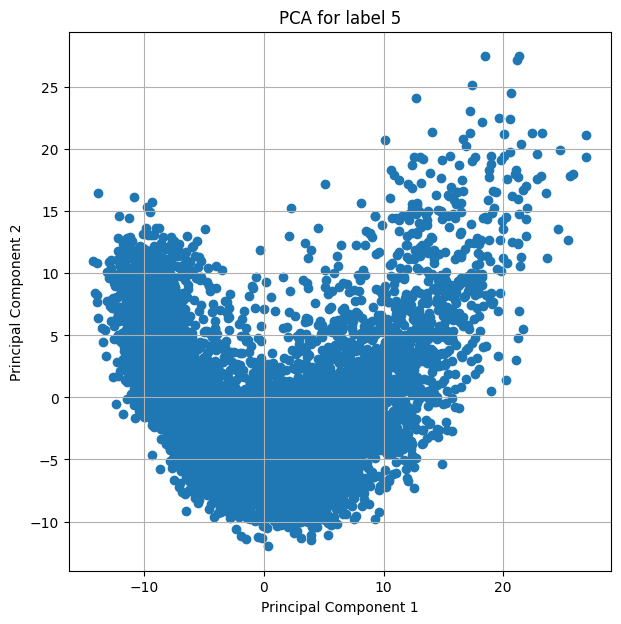

In [52]:
plt.figure(figsize=(7, 7))
plt.scatter(PCASets[5][:, 0], PCASets[5][:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for label 5')
plt.grid(True)
plt.show()

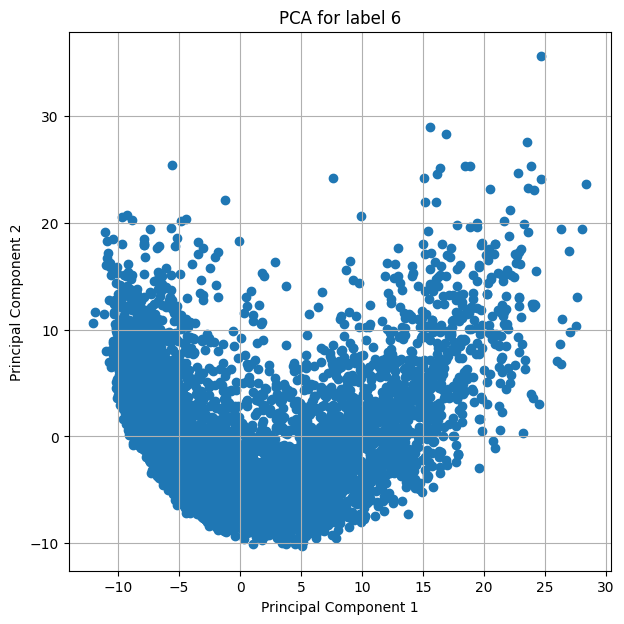

In [53]:
plt.figure(figsize=(7, 7))
plt.scatter(PCASets[6][:, 0], PCASets[6][:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for label 6')
plt.grid(True)
plt.show()

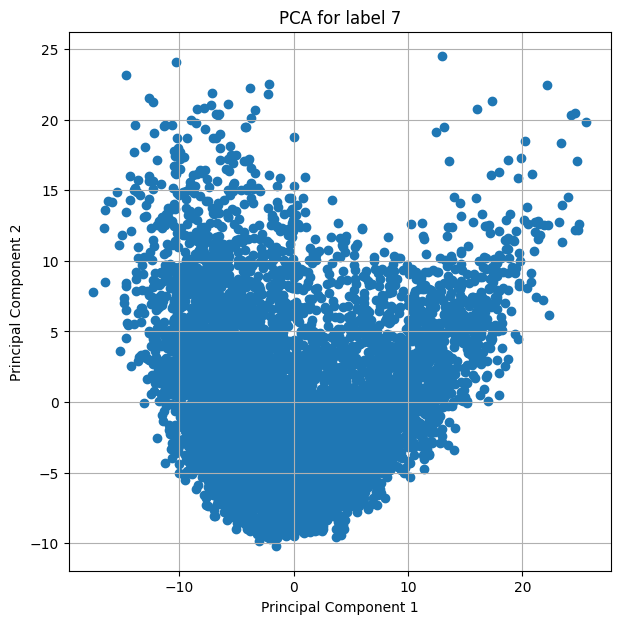

In [54]:
plt.figure(figsize=(7, 7))
plt.scatter(PCASets[7][:, 0], PCASets[7][:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for label 7')
plt.grid(True)
plt.show()

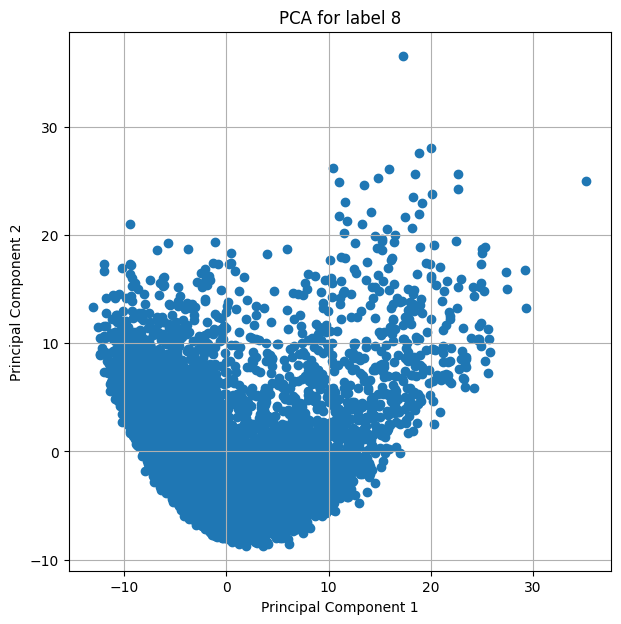

In [55]:
plt.figure(figsize=(7, 7))
plt.scatter(PCASets[8][:, 0], PCASets[8][:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for label 8')
plt.grid(True)
plt.show()

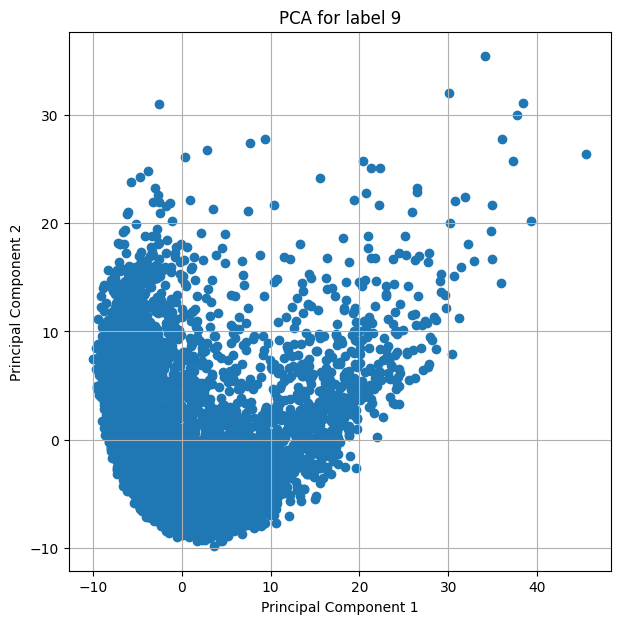

In [56]:
plt.figure(figsize=(7, 7))
plt.scatter(PCASets[9][:, 0], PCASets[9][:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for label 9')
plt.grid(True)
plt.show()